In [1]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [2]:
import numpy as np
print('shape is', np.shape(digits.data))
digits.data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

shape is (1797, 64)


In [3]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.score(x_train, y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9962880475129918

In [4]:
logisticRegr.score(x_test, y_test)

0.9533333333333334

Text(0.5, 1.0, 'image with lavel0')

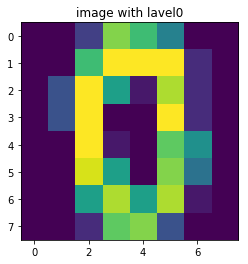

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[20])
plt.title('image with lavel' + str(digits.target[20]))

In [6]:
y_train

array([2, 8, 9, ..., 7, 7, 8])

In [7]:
###Expand the shape of an array.
np.expand_dims(y_train, axis=1)

array([[2],
       [8],
       [9],
       ...,
       [7],
       [7],
       [8]])

In [8]:
# prepare data for tensorflow multi labels
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()#Encode categorical integer features as a one-hot numeric array.

# 2. FIT
enc.fit(np.expand_dims(y_train, axis=1))
onehot_train = enc.transform(np.expand_dims(y_train,axis =1)).toarray()### toarray make it good for eyes
onehot_train

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [9]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [10]:
import tensorflow as tf
## placeholder: Inserts a placeholder for a tensor that will be always fed.
X  = tf.placeholder(tf.float32,[None,64])
Y_true = tf.placeholder(tf.float32,[None,10])

In [11]:
Y_true

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

In [12]:
#### define every layers
L =200
M = 100
N = 60
O = 30
### set bias as zero just because this is just initial value
w1 = tf.Variable(tf.truncated_normal([64,L],stddev = 0.1)) ## from input layer to first layer
b1 = tf.Variable(tf.zeros(L))
w2 = tf.Variable(tf.truncated_normal([L,M],stddev = 0.1))
b2 = tf.Variable(tf.zeros(M))
w3 = tf.Variable(tf.truncated_normal([M,N],stddev = 0.1))
b3 = tf.Variable(tf.zeros(N))
w4 = tf.Variable(tf.truncated_normal([N,O],stddev = 0.1))
b4 = tf.Variable(tf.zeros(O))

w5 = tf.Variable(tf.truncated_normal([O,10],stddev = 0.1))
b5 = tf.Variable(tf.zeros(10))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
Y1 = tf.nn.sigmoid(tf.matmul(X,w1)+b1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1,w2)+b2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2,w3)+b3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3,w4)+b4)

Ylogits = tf.matmul(Y4,w5) + b5 ##because we need to do classification and calculate probability . 
###we don't care the probaility in hidden layers,cost function has two log
Y = tf.nn.softmax(Ylogits)

In [14]:
##define loss,reduce_mean:Computes the mean of elements across dimensions of a tensor.
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_true)) 
learning_rate = 0.003
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
### index, argmax:Returns the index with the largest value across axes of a tensor. (deprecated arguments)
correct_pred = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_true, 1))#####???????
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))## change the correct_pred into float32 format

In [15]:
# initialize
init = tf.global_variables_initializer()
##tf.session: A class for running TensorFlow operations.
sess = tf.Session()
batch_size = 200
num_epochs = 100
batch_count = int(len(x_train)/batch_size)
sess.run(init)

In [16]:
for step in range(1,num_epochs+1):
    for i in range(batch_count):
        batch_x,batch_y = next_batch(batch_size,x_train,onehot_train)
        sess.run(train_op, feed_dict={X: batch_x, Y_true: batch_y})
    loss,acc = sess.run([loss_op,accuracy],feed_dict = {X: batch_x, Y_true:batch_y})
    print('step number',step,'loss is' ,loss,"accuracy",acc)

step number 1 loss is 2.28786 accuracy 0.24
step number 2 loss is 2.2828226 accuracy 0.105
step number 3 loss is 2.241151 accuracy 0.33
step number 4 loss is 2.1680982 accuracy 0.5
step number 5 loss is 2.0957606 accuracy 0.48
step number 6 loss is 1.9536449 accuracy 0.55
step number 7 loss is 1.8183322 accuracy 0.695
step number 8 loss is 1.6952916 accuracy 0.655
step number 9 loss is 1.5344843 accuracy 0.735
step number 10 loss is 1.3407168 accuracy 0.76
step number 11 loss is 1.2828332 accuracy 0.75
step number 12 loss is 1.1992944 accuracy 0.76
step number 13 loss is 1.0895442 accuracy 0.85
step number 14 loss is 0.99698853 accuracy 0.84
step number 15 loss is 0.8875805 accuracy 0.86
step number 16 loss is 0.81996995 accuracy 0.905
step number 17 loss is 0.7466749 accuracy 0.905
step number 18 loss is 0.6693388 accuracy 0.915
step number 19 loss is 0.61560255 accuracy 0.945
step number 20 loss is 0.5712262 accuracy 0.975
step number 21 loss is 0.55892044 accuracy 0.97
step number 2

In [17]:
##### try the test data
onehot_test = enc.transform(np.expand_dims(y_test,axis =1)).toarray()
onehot_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [18]:
sess.run([loss_op,accuracy],feed_dict = {X: x_test, Y_true: onehot_test})

[0.20703858, 0.9577778]

In [19]:
sess.run([loss_op,accuracy],feed_dict = {X: x_train, Y_true: onehot_train})

[0.01699571, 1.0]